In [30]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import wordcloud as wc
from bokeh.models import Range1d

from bokeh.plotting import figure, output_notebook, show
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
%matplotlib inline

output_notebook()

Loading BokehJS ...

In [31]:
data=pd.read_excel('../data/Second-Hand House plus.xlsx')
# lab:  ['房屋户型', '所在楼层', '建筑面积', '户型结构', '套内面积', '建筑类型', '房屋朝向', '建筑结构', '装修情况', '梯户比例', '供暖方式', '配备电梯']
# key1:  ['挂牌时间', '交易权属', '上次交易', '房屋用途', '房屋年限', '产权所属', '抵押信息', '房本备件']
# key:  ['核心卖点', '小区介绍', '周边配套', '交通出行']

'''
['标题','总价格','单价','地段','房屋户型', '所在楼层', '建筑面积', '户型结构', '套内面积', '建筑类型', '房屋朝向', '建筑结构', '装修情况', '梯户比例', '供暖方式', '配备电梯','挂牌时间', '交易权属', '上次交易', '房屋用途', '房屋年限', '产权所属', '抵押信息', '房本备件','核心卖点', '小区介绍', '周边配套', '交通出行']
'''

"\n['标题','总价格','单价','地段','房屋户型', '所在楼层', '建筑面积', '户型结构', '套内面积', '建筑类型', '房屋朝向', '建筑结构', '装修情况', '梯户比例', '供暖方式', '配备电梯','挂牌时间', '交易权属', '上次交易', '房屋用途', '房屋年限', '产权所属', '抵押信息', '房本备件','核心卖点', '小区介绍', '周边配套', '交通出行']\n"

# 词云

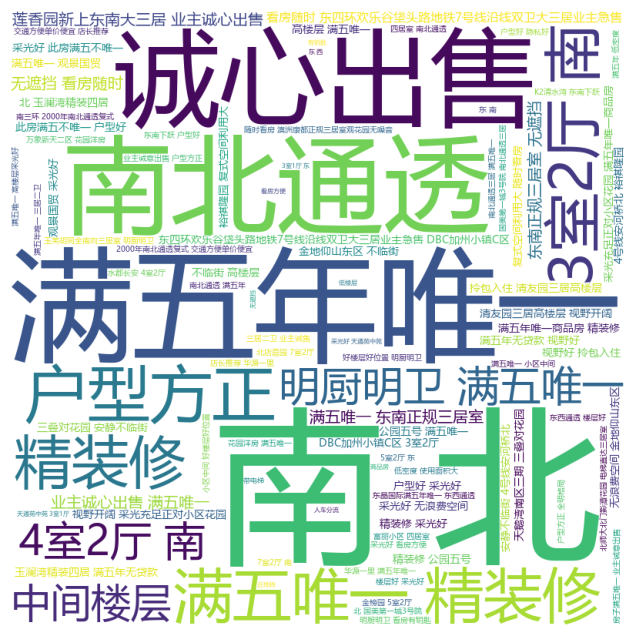

In [32]:
#生成标题关键词 词云
df=data
text_title=' '.join(df['标题'])
w=wc.WordCloud(background_color='white',width=800,height=800,max_words=100,font_path='msyh.ttc').generate(text_title)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(w)
plt.axis("off")
plt.show()

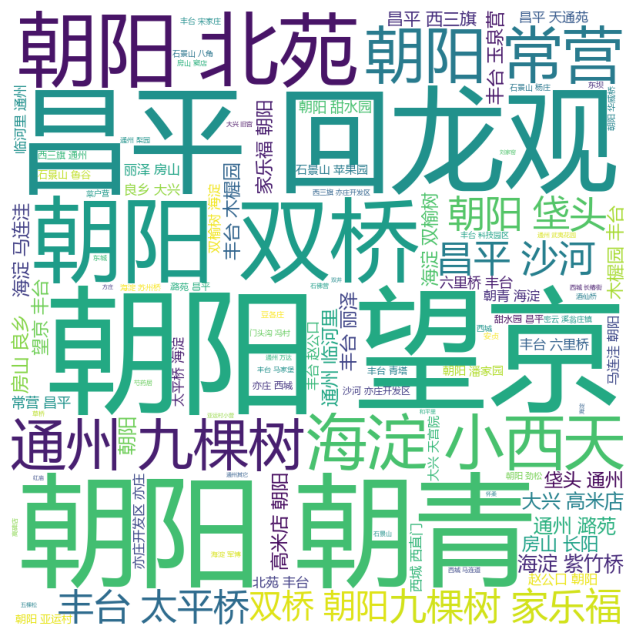

In [33]:
#地段词云
text_title=' '.join(df['地段'])
stopwords= {"海淀'"}
w=wc.WordCloud(background_color='white',width=800,height=800,font_path='msyh.ttc',max_words=100)
w.generate(text_title)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(w)
plt.axis("off")
plt.show()

## 小提琴图&箱线图

In [34]:
#将data按单价从低到高排序
data.sort_values(by='单价',inplace=True)

# 假设 '建筑结构' 列是 x 轴，'房屋价格' 列是 y 轴
fig = px.violin(data, x='建筑结构', y='单价', title='建筑结构 vs.单价 分布')
fig.show()


砖混结构的房屋价格分布较为集中，且集中在6w/平，混合结构的房屋价格分布较为分散

In [35]:
#绘制箱线图
fig = px.box(data, x='地段_区', y='单价', title='地段_区 vs. 房屋单价分布')
fig.show()

丰台、朝阳、海淀房价分布离散程度较高，西城区房价集中在较高价位

In [36]:
df = data

# 假设日期列名为'挂牌时间'，确保该列数据类型为日期类型
df['挂牌时间'] = pd.to_datetime(df['挂牌时间'])

# 提取每月的年份和月份
df['Year'] = df['挂牌时间'].dt.year
df['Month'] = df['挂牌时间'].dt.month
# 绘制小提琴图
fig = px.violin(df, x='Month', y='单价',
                labels={'Month': '月份', '单价': '单价'},
                title='每月单价小提琴图')
# 
# fig = px.box(df, x='Month', y='单价',
#              labels={'Month': '月份', '单价': '单价'},
#              title='每月单价 箱线图')

# 可以根据需要进行其他图表样式的设置

# 显示图表
fig.show()



夏季房价分布较为集中，冬季房价分布较为分散且偏高

# 价格分布图

In [37]:
df = data

# 假设日期列名为'挂牌时间'，确保该列数据类型为日期类型
df['挂牌时间'] = pd.to_datetime(df['挂牌时间'])

# 提取每周的年份和周数
df['Year'] = df['挂牌时间'].dt.year
df['Week'] = df['挂牌时间'].dt.isocalendar().week

# 计算每周的平均价格
weekly_avg_price = df.groupby(['Year', 'Week'])['单价'].mean().reset_index()


fig = px.line(weekly_avg_price, x='Week', y='单价', color='Year', 
              labels={'Week': '周数', '单价': '平均单价 （元/平方米）'},
              title='每周平均单价波动图')

# 可以根据需要进行其他图表样式的设置
fig.update_layout(legend_title='年份')

# 显示图表
fig.show()


In [38]:
# 筛选出start_date之后的数据
start_time='2023-01-01'
df=data

df=df[df['挂牌时间']>=start_time]
df.sort_values(by='挂牌时间')

price=df.单价
date=df.挂牌时间

# #将date转为datetime格式
date=pd.to_datetime(date)

#计算并存储每天平均的价格
date_price=price.groupby(date).mean()
#提取price中的data和price
price=date_price.tolist()
date=date_price.index.tolist()


pre_price=[i/1000 for i in price]

p = figure(title=start_time+"以来时间-价格波动图", x_axis_label='Date', y_axis_label='Price 千元/平方米',x_axis_type="datetime",y_range=Range1d(min(pre_price), max(pre_price)))


#设置x轴间距
p.xaxis.major_label_orientation = 1
#绘制散点图
p.circle(x=date, y=pre_price, line_width=2,fill_color="green", size=4)
#绘制折线图
p.line(x=date, y=pre_price, legend_label="价格", line_width=2)
show(p)

In [39]:
#获取每个地段房屋的平均单价
price=data.groupby('地段_区')['单价'].mean()
price.sort_values(inplace=True)

#获取地段名称
location=price.index.tolist()
#绘制柱状图
fig = px.bar(x=location, y=price, title='地段 vs. 房屋单价分布')
fig.show()

%%
 pd.cut 函数用于将连续的数值数据分成不同的区间。这里，我们将数据框 df 中的 '总价格' 列的值分到指定的价格区间中。bins 参数接受一个包含分割点的列表，我们使用了 price_ranges 中每个元组的下限作为分割点，同时在列表末尾添加了正无穷，以确保最后一个区间包括所有大于等于2001的价格。labels 参数指定了每个区间的标签，即我们要将区间的范围表示为字符串，例如 '0 - 500'。
 %%

In [ ]:
df = data

# 假设总价格区间范围已知，可以根据实际情况进行调整
price_ranges = [(0, 200), (201, 400), (401, 600), (601, 800),(801,1000), (1001,1200),(1201,1400),(1401, float('inf'))]

# 创建一个新列来标记每个房产所属的总价格区间
df['Price Range'] = pd.cut(df['总价格'], bins=[r[0] for r in price_ranges] + [float('inf')],
                           labels=[f'{r[0]} - {r[1]}' for r in price_ranges])

fig = px.bar(df['Price Range'].value_counts().reset_index(),
             x='Price Range', y='count', title='房产总价分布图',
             labels={'Price Range': '总价格区间', 'count': '房产数量'})


# 显示图表
fig.show()

In [41]:

# 提取所需的列数据

x = data['梯户比例']

y = data['楼层数']

z = data['单价']

#固定x

# 使用Plotly绘制可交互的3D散点图
fig = px.scatter_3d(data_frame=data, x=x, y=y, z=z, color=z, opacity=0.7,
                    labels={'x': '梯户比例', 'y': '楼层', 'z': '单价'})

# 设置图形布局
fig.update_layout(scene=dict(xaxis_title='梯户比例', yaxis_title='楼层', zaxis_title='单价'))

# 显示图形
fig.show()


梯户比例集中在0.5以下，30层以上单价略低，最高单价出现在15-20层之间

## 类型比例图（饼状图）

In [42]:
fig=px.pie(data['建筑类型'].value_counts(),names=data['建筑类型'].value_counts().index,values=data['建筑类型'].value_counts().values,title='建筑类型比例')
fig.show()

In [43]:
fig=px.pie(data['交易权属'].value_counts(),names=data['交易权属'].value_counts().index,values=data['交易权属'].value_counts().values,title='交易权属比例')
fig.show()

In [44]:
fig = px.pie(data['装修情况'].value_counts(), names=data['装修情况'].value_counts().index, values=data['装修情况'].value_counts().values, title='装修情况比例')
fig.show()